## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [3]:
your_name = "Hatim Hussaini"
your_student_id = "47807040"

In [5]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [7]:
#reading the data
car = pd.read_csv('/Users/hatimhussaini/Downloads/Github Repository/portfolio-part-1-hatimhussaini/Portfolio Part 1 resources-20240813/car_sell.csv')
#naming unnamed column
car.rename(columns={"Unnamed: 0": "index"}, inplace=True)
print(car.shape)
# removing all rows where fuel is none
car = car[ car['fuel'] != 'none']
print(car.shape)
# removing all rows where year is null
car = car.dropna(subset = ['year'])
print(car.shape)

print(car)


(4340, 9)
(4181, 9)
(3886, 9)
      index                                 name    year  selling_price  \
0         0                        Maruti 800 AC  2007.0          60000   
1         1             Maruti Wagon R LXI Minor  2007.0         135000   
2         2                 Hyundai Verna 1.6 SX  2012.0         600000   
3         3               Datsun RediGO T Option  2017.0         250000   
4         4                Honda Amaze VX i-DTEC  2014.0         450000   
...     ...                                  ...     ...            ...   
4335   4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014.0         409999   
4336   4336           Hyundai i20 Magna 1.4 CRDi  2014.0         409999   
4337   4337                  Maruti 800 AC BSIII  2009.0         110000   
4338   4338     Hyundai Creta 1.6 CRDi SX Option  2016.0         865000   
4339   4339                     Renault KWID RXT  2016.0         225000   

      km_driven    fuel seller_type transmission         owner  
0   

## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [11]:
#Q2.1:

car.nunique()

index            3886
name             1402
year               27
selling_price     425
km_driven         715
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [13]:
#Q2.2:

car['km_driven'].describe()

count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [15]:
#Q2.3:

car.groupby('seller_type')['selling_price'].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,889.0,702093.314961,813597.811832,22000.0,300000.0,490000.0,746000.0,8900000.0
Individual,2903.0,421169.410265,420273.684129,20000.0,170000.0,300000.0,540000.0,4800000.0
Trustmark Dealer,94.0,935797.872340,655724.299195,315000.0,625000.0,750000.0,760000.0,2600000.0


In [17]:
#Q2.4:

car.groupby('owner')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
First Owner,2532.0,2014.453791,3.555597,1996.0,2012.00,2015.0,2017.0,2020.0
Fourth & Above Owner,67.0,2007.238806,5.248635,1992.0,2004.00,2008.0,2010.5,2020.0
Second Owner,1000.0,2010.977000,3.840993,1995.0,2009.00,2011.5,2014.0,2019.0
Test Drive Car,14.0,2019.642857,0.633324,2018.0,2019.25,2020.0,2020.0,2020.0
Third Owner,273.0,2009.413919,3.920266,1997.0,2007.00,2010.0,2012.0,2019.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

### Plot 1: Fuel Type vs Selling Price

/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_17414/976768977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x= "fuel", y= "selling_price",data = car, palette = colorpalette)
/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_17414/976768977.py:2: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
  sns.boxplot( x= "fuel", y= "selling_price",data = car, palette = colorpalette)


Text(0, 0.5, 'Selling Price as a Logarithmic Function')

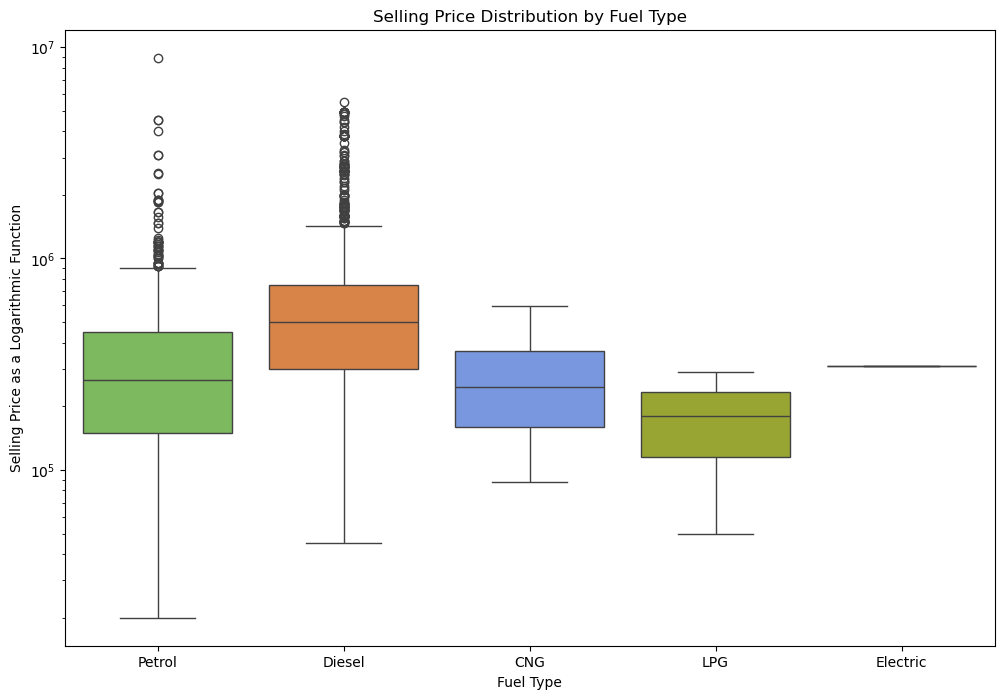

In [31]:
plt.figure(figsize=(12, 8)) 
sns.boxplot( x= "fuel", y= "selling_price",data = car, palette = colorpalette)
plt.yscale('log')
plt.title('Selling Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price as a Logarithmic Function')

#### Analysis  
The box plot above shows the selling price of different vehicles based on the type of fuel they use. it is a visualisation where we can see interesting details about the dataset such as:
* The y axis has a log function applied to it showing just how varied the prices of these cars are ranging from less than 100,000 to $ 10^7 $ (10,000,000)
* The median of diesel cars is the highest at close to $ 10^ {5.8} $(630,000) closely followed by the electric petrol and CNG fuel types at around $10^{5.5}$ (316,000) and finally LPG with the lowest median of all the cars
* Cars which operate on diesel or petrol have the longest whiskers and really high outliers which reach upto a 10,000,000 showcasing a larger spread of selling prices of these cars
* The significant number of outliers of diesel and petrol may indicate that these cars are sold at a higher price than normal even in the same fuel type of cars which represents the existence of high end and luxury cars
  
This boxplot visualizes the selling prices of different types of cars based on the type of fuel they use with a log function helping in manage visualizing the huge spread of prices. Petrol and Diesel operated cars have a generally higher price range and high variability amongst them while LPG and electric cars are much more concentrated in a smaller price range.

### Plot 2: Year vs Selling Price:

Text(0.5, 1.0, 'Year vs Selling Price (color coded by fuel type)')

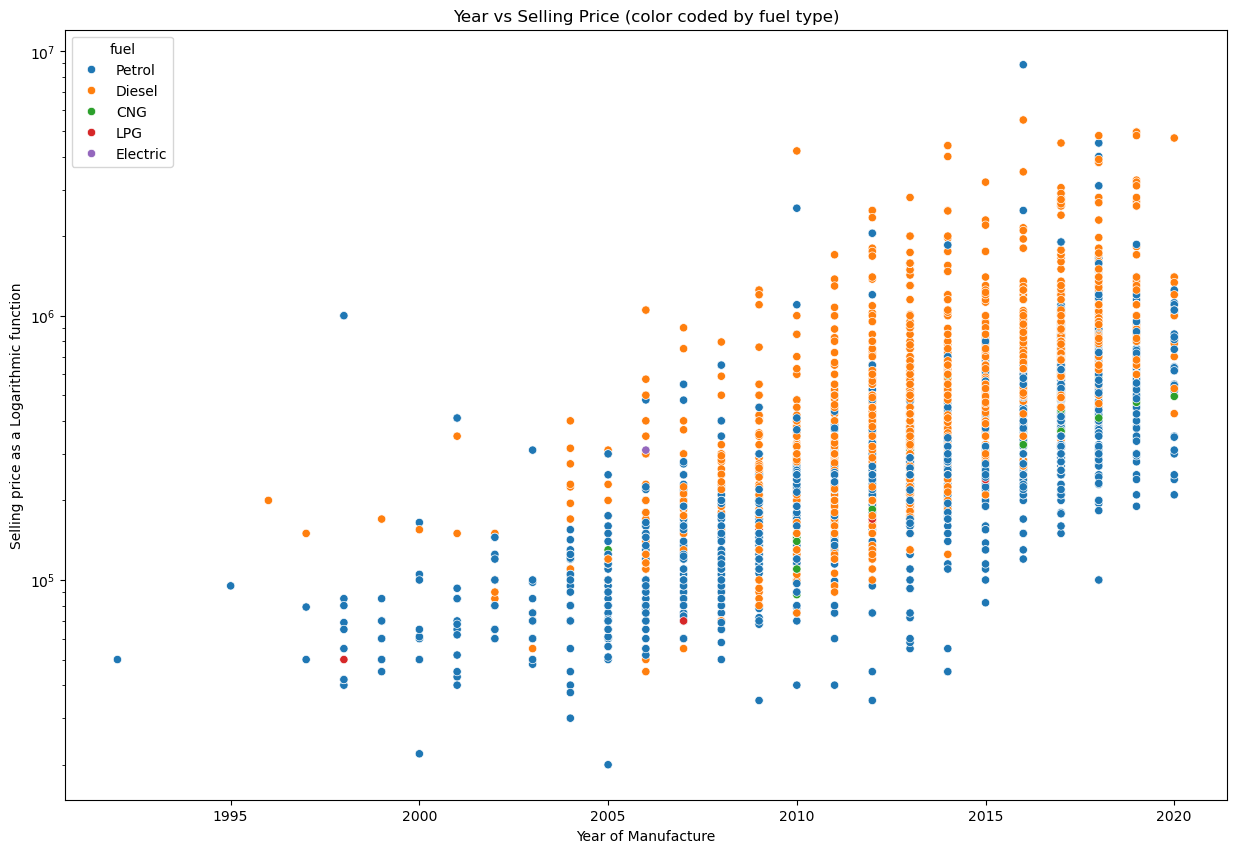

In [65]:
plt.figure(figsize=(15, 10)) 
sns.scatterplot(x='year', y= 'selling_price', data= car, hue = 'fuel')
plt.yscale('log')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling price as a Logarithmic function')
plt.title('Year vs Selling Price (color coded by fuel type)')

#### Analysis:  
The scatter plot created above compares the selling price of cars (y axis) based on their year of manufacture (x axis) and is sorted colorwise based on their fuel type. This scatterplot can be interpreted in the following ways:  
* The plot shows an upwards trend as time increases where the selling price of cars increases as time edges closer to the present. This showcases the impact of time on these cars as well as the change in buyer preferences over time.
* the datapoints are more clustered towards recent years indicating that the demand, selling price as well as the general availability/supply of cars is that of the more recent models compared to the years before 2004.
* The spread in the selling prices of cars in the earlier years is noticeably higher in the earlier years of the plot such as the years of 1997 to 1999. This might point towards the general condition of the cars or even the demand for certain types of vintage cars.
* The newer models' datapoints are less dispersed compared to the older models which indicate stable prices. it is to be noted that there is still some variability which can be attributed to the difference in different types of car models or features.
* Petrol and diesel fuel types are prevalent in the scatter plot. The plot ony contains the record of one electric car made in 2006. The car was although sold at a really respectable price compared to the cars manufactured in the same year as the elctric car.
* Diesel operated cars sell for a higher price in general as shown in the boxplot above aas well while the petrol operated cars rise in price at a much steadier pace.
  
The scatterplot shows the influence of year of manufacture of cars on their selling prices with newer cars doing better and selling more than older cars with a few exceptions. This plot could always be analysed better if taken into account the market conditions as the years progress or conducting a regression analysis test to better quantify this relationship.

### Plot 3: Seller Type vs Selling Price


/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_17414/3822739435.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='selling_price', x='seller_type', data = car, palette = colorpalette)
/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_17414/3822739435.py:18: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.violinplot(y='selling_price', x='seller_type', data = car, palette = colorpalette)


Text(0, 0.5, 'Selling Price')

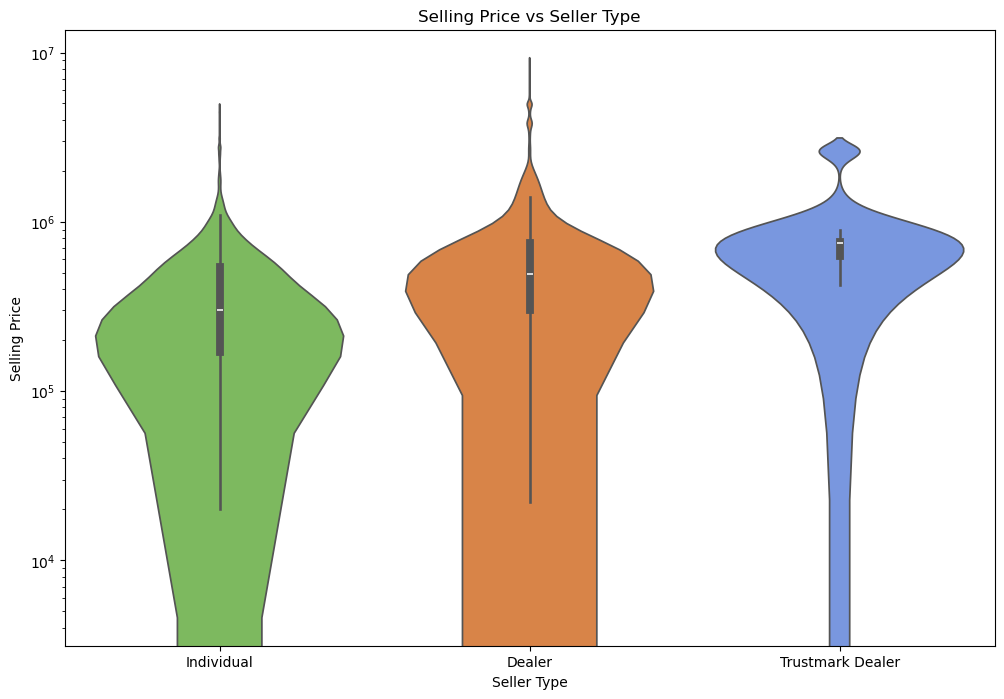

In [68]:
plt.figure(figsize=(12, 8)) 
colorpalette = ['#78C850',  
                    '#F08030',  
                    '#6890F0', 
                    '#A8B820', 
                    '#A8A878', 
                    '#A040A0', 
                    '#F8D030',
                    '#E0C068', 
                    '#EE99AC', 
                    '#C03028', 
                    '#F85888',
                    '#B8A038', 
                    '#705898',
                    '#98D8D8',
                    '#7038F8', 
                   ]
sns.violinplot(y='selling_price', x='seller_type', data = car, palette = colorpalette)
plt.yscale('log')
plt.title('Selling Price vs Seller Type')
plt.suptitle('') 
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')


#### Analysis:  
The violinplot above compares the selling prices of cars based on the type of seller. the plot above shows the following:  
* The spread of data is quite narrow and the  median selling price of a trustmark dealer is the highest followed by a normal dealer and lastly the individual. This shows that giving your car to a trusted and safe organization may give you a much more expected return than that of the other two seller types.
* The IQR of the individual sellers is the most varied with a high amount of outliers showcasing a large amount of variation as well as when coupled with the huge bottom whisker and the lowest median price, it can be said that the individuals, eventhough tend to price their cars the lowest, some individuals price their cars higher than the rest; probably due to higher end, luxury cars.
* Dealer seller type also follows a similiar pattern but its outliers are much higher, reaching upto 10,000,000. This implies that dealers tend to price their cars higher than other types of sellers.
  
In conclusion, a trustmarked dealer sells their cars for the highest price out of all the seller prices but all the cars it sells are more or less in a similiar price range with little variability. The dealer has a wide range of prices indicating a variety of different types of cars sold. Finally the individual seller also has a wide range of selling prices which may point towards a variety of cars and market conditions.

### Plot 4: Owner type vs Selling Price:

/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_5971/1446933164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='selling_price', x='owner', data = car, palette = colorpalette)
/var/folders/lw/zb_b4kcs54lcy4zn4llwx5m40000gn/T/ipykernel_5971/1446933164.py:2: UserWarning: The palette list has more values (14) than needed (5), which may not be intended.
  sns.boxplot(y='selling_price', x='owner', data = car, palette = colorpalette)


Text(0, 0.5, 'Selling Price')

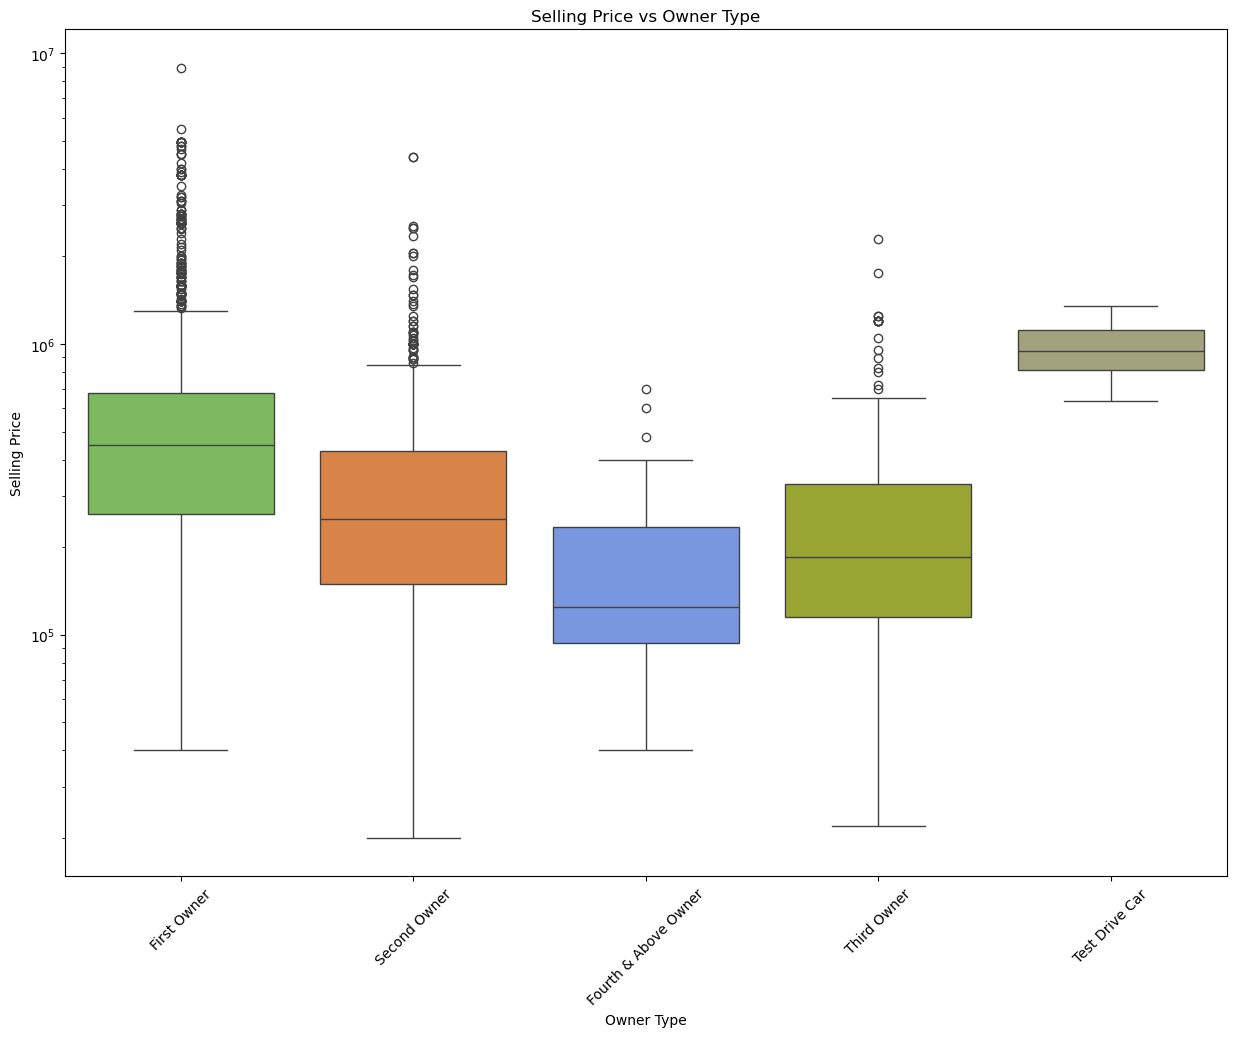

In [55]:
plt.figure(figsize = (15,11))
sns.boxplot(y='selling_price', x='owner', data = car, palette = colorpalette)
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Selling Price vs Owner Type')
plt.suptitle('')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')

#### Analysis:  
The boxplot above is the comparision between different owner types and the selling price of their cars. The visualisation of this data brings forth interesting observations such as:  
* Test driven cars lead the way in terms of median selling price at $10^6$ (1,000,000) followed in order by the owner types one till four and above. This follows the patterns of the cars that have gone through the least amount of hands, consistently sell the highest.
* The box in the middle which represents the IQR or the middle 50% of the data for the different owner types shows that unlike the rest, the test drive cars have a really small area incased in the box indicating a relatively narrow range compared to the rest. This implies uniformity of prices in this owner type.
* The first owner type shows a significant number of high-priced outliers, indicating that some first owner cars are sold at much higher prices than the typical range. This trend continues but thins out as cars get passed down to second, third and fourth and above owner types indicating that these types of cars are rarely sold at higher prices than they are supposed to, rather sold towards the lower ends of their respective ranges. This also shows a downward trend in seller prices and showcases the effect of depreciation on cars
* On the other hand, test driven cars does not have any outliers at all showing that they are priced and sold at a really consistent range, probably due to the fact that cars of this caliber are still under the possession of their dealership manufacturers, are relatively new and are only sold according to company prices.

To conclude, test driven cars and first owned cars tend to attract the highest amount of prices due to their low wear and tear and minimal usage while cars with two or more owners sell at a much lower price. This boxplot also visualises how ownership history impacts the price of cars.

### Plot 5: Kilometres driven vs Selling price

Text(0, 0.5, 'Selling Price')

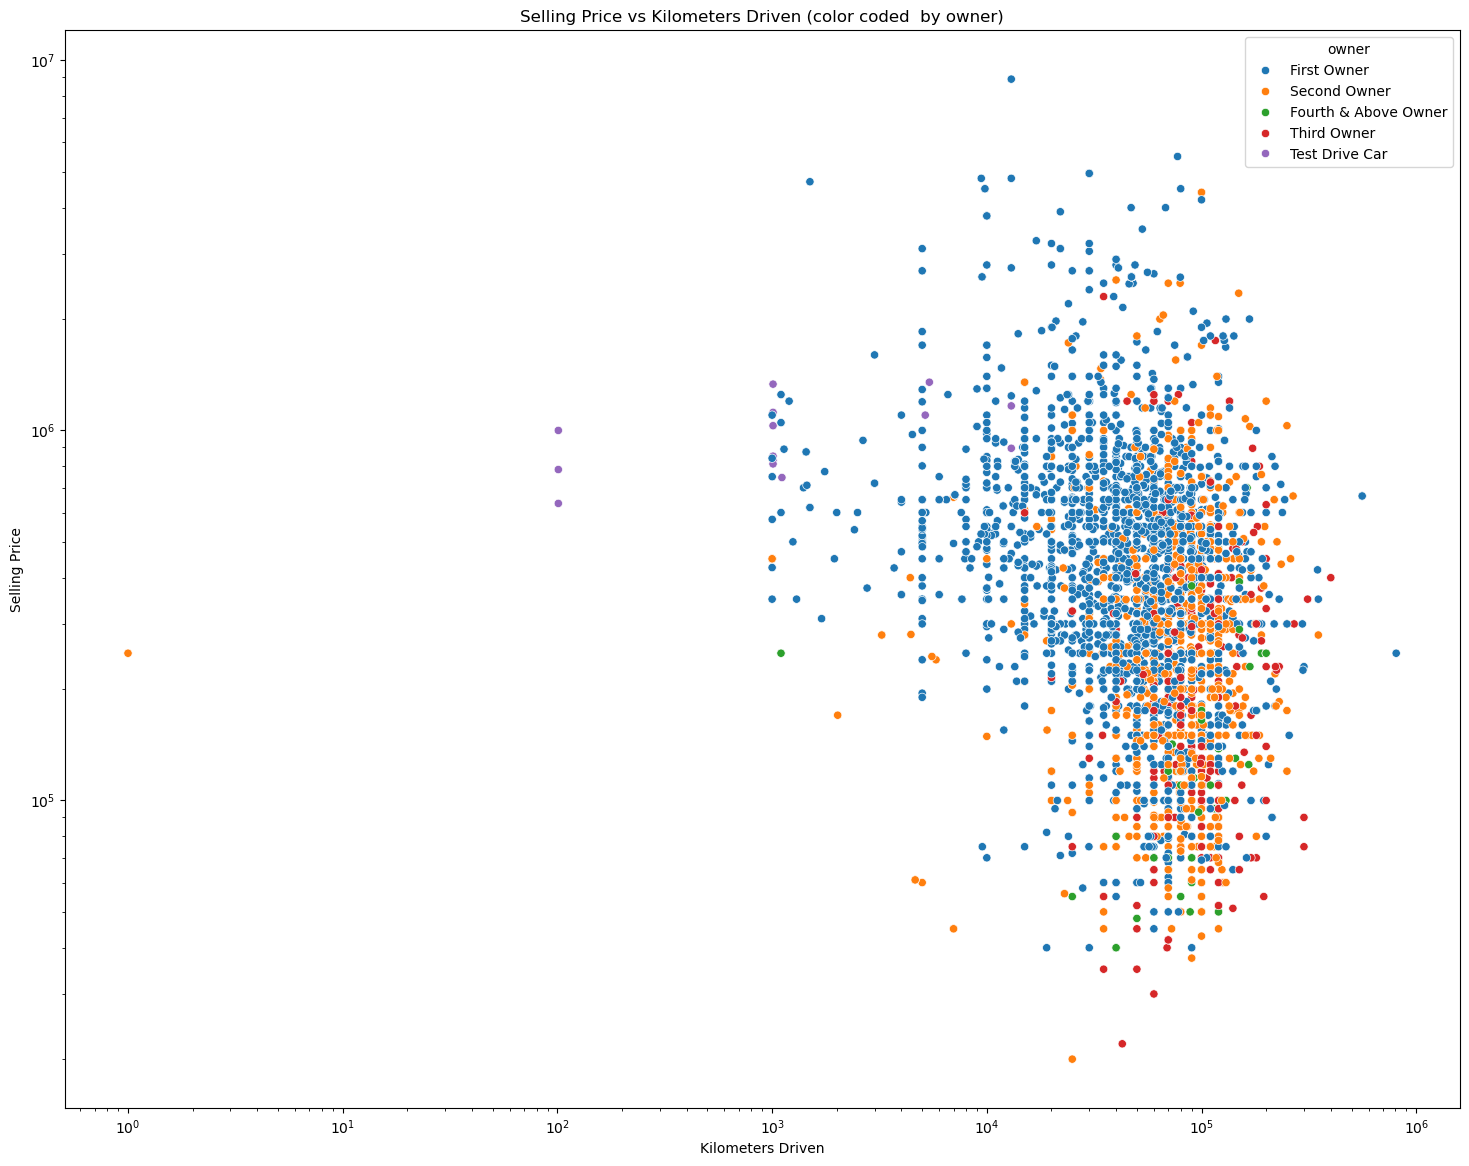

In [83]:
plt.figure(figsize=(18, 14)) 
#plt.scatter(car['km_driven'], car['selling_price'], alpha=0.2)
sns.scatterplot(x= 'km_driven',y='selling_price', data = car, hue= 'owner')
plt.yscale('log')
plt.xscale('log')
plt.title('Selling Price vs Kilometers Driven (color coded  by owner)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

#### Analysis:  
The scatterplot above shows the  relationship between Selling Price (y-axis) and Kilometers Driven (x-axis) for cars in the dataset and is arranged by color for each type of owner the car had.  
* The general relationship between the two datatypes is that of a negative correlation due to a downward trend of selling prices as kilometres increase. This goes hand in hand with the general understanding that cars that are used more tend to sell for a lower price than cars that have travelled less distances.
* The datapoints are clustered among a small range of values ranging from $10^4$ to $10^5$ (10,000 to 1000,000) kilometres driven and $10^5$ to $10^6$ (100,000 to 1,000,000) selling price. We can infer that the majority of cars in this dataset are used cars thus their depreciation is of a understandable and predictable rate.
* There are some outliers and anomalies in this plot as well such as low mileage and high prices. These could be luxury or highly maintained cars that have not depreciated in value much. there also some noticible datapoints with really high mileage but still priced at a respectable level. These again could be well maintained or premium cars that have retained their value.
* It can be seen that the blue markers of the first owner datapoints tend to have a lower mileage on their cars and thus sell their car for a heigher price and following this trend, mileage increases and selling price decreases as number of owners increase.
* As always even this has outliers such as a fourth & above owner selling their car for approx $10^{6.2}$ while their mileage is in the top 55th percentile (approximation).

This scatterplot follows then general market rules of depreciation and how only well maintained or luxury vehicles retain their value and the value of other cars dip significantly as their distance travelled increases.

### Final Analysis of All Plots:  
The analysis of the plots provides very important insights such as:

The selling price of Diesel and Petrol cars is the most varied, with many high outliers, indicating that more expensive or luxurious cars are part of these categories. On the other hand, LPG and Electric cars range over narrow and lower-priced ranges.

The general trend for the price of cars is a upward trend, which due to the impact of better technology and consumer choice, as well as the depreciation of older vehicles. Prices for older cars are generally less in order, probably because of factors such as vintage status or different wear and tear conditions.

Trustmark Dealers achieve the most consistent selling prices. Individual Sellers have the most varied pricing, more than likely reflecting the mix of car conditions and models as well as lack of bargaining power. Dealers showcases a wider variance of prices and higher outliers.

Cars categorized as Test Drive or First Owner show the highest prices, meaning there is value placed in fewer owners. As the number of previous owners increases, sale prices tend to decrease, following the rule of common depreciation. This could also be general apprehension of buyers to buy cars with long ownership history.

There is a negative correlation between kilometers driven and selling price, following the payttern that higher mileage reduces a car's value. Outliers in the dataset, such as high-priced, low mileage cars, likely represent luxury or well maintained vehicles that retain their value.

In conclusion, all these graphs are showing common market trends, like how mileage, ownership history, and fuel type impact price. The existence of outliers across the various plots highlight the importance of  factors like brand, condition, and luxury status, which can be really important for a vehicle's resale price.

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [196]:
print(len(car))
car_clean_1 = car[car['owner'] != 'Fourth & Above Owner']
print(len(car_clean_1))
car_clean_1 = car[(car['owner'] != 'Fourth & Above Owner') & (car['owner'] != 'Test Drive Car')]
print(len(car_clean_1))
car_clean_2 = car_clean_1[car_clean_1['fuel'] != 'Electric']
print(len(car_clean_2))
car_clean_2 = car_clean_1[(car_clean_1['fuel'] != 'Electric') & (car_clean_1['fuel'] != 'LPG')]
print(len(car_clean_2))
car_clean_2 = car_clean_1[
    (car_clean_1['fuel'] != 'Electric') 
    & (car_clean_1['fuel'] != 'LPG') 
    & (car_clean_1['fuel'] != 'CNG')
]
print(len(car_clean_2))

car_clean_3 = car_clean_2[car_clean_2['seller_type'] != 'Trustmark Dealer']
print(len(car_clean_3))
print (len(car_clean_3))
print(car_clean_3)

3886
3819
3805
3804
3784
3751
3657
3657
      index                                 name    year  selling_price  \
0         0                        Maruti 800 AC  2007.0          60000   
1         1             Maruti Wagon R LXI Minor  2007.0         135000   
2         2                 Hyundai Verna 1.6 SX  2012.0         600000   
3         3               Datsun RediGO T Option  2017.0         250000   
4         4                Honda Amaze VX i-DTEC  2014.0         450000   
...     ...                                  ...     ...            ...   
4335   4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014.0         409999   
4336   4336           Hyundai i20 Magna 1.4 CRDi  2014.0         409999   
4337   4337                  Maruti 800 AC BSIII  2009.0         110000   
4338   4338     Hyundai Creta 1.6 CRDi SX Option  2016.0         865000   
4339   4339                     Renault KWID RXT  2016.0         225000   

      km_driven    fuel seller_type transmission         ow